In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex
from scipy.optimize import curve_fit
%matplotlib inline

-0.03113899352595622 278.4288631322702


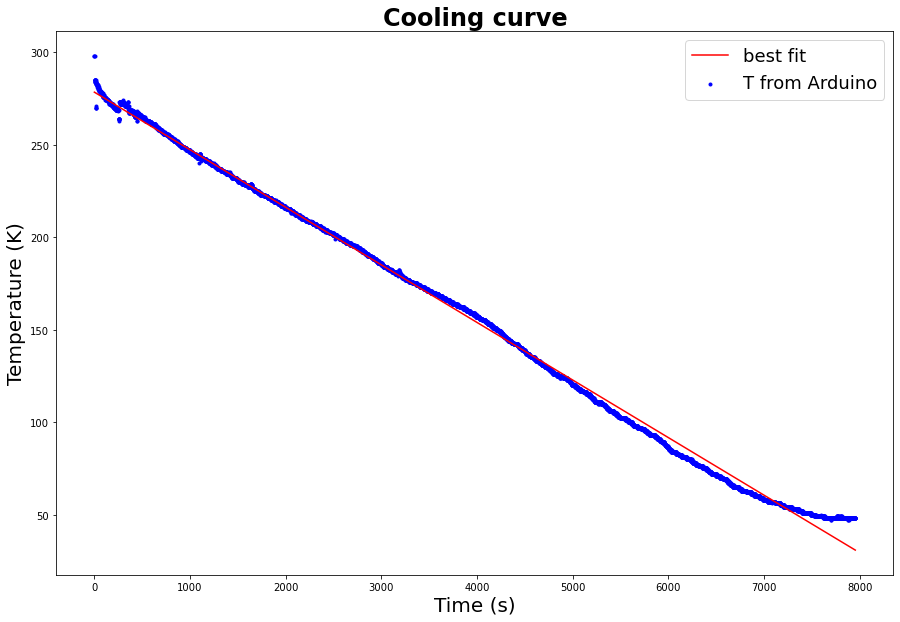

In [4]:
data = np.loadtxt("data\dati_2.txt")
x = data[:,0]
y = data[:,1]
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(x=x, y=y, marker='.', c='b', label="T from Arduino")
#ax.plot(x, y, linewidth=3,  c="coral", label="T from Arduino")
ax.set_title('Cooling curve',weight='bold', size=24)
ax.set_xlabel('Time (s)', fontsize=20)
ax.set_ylabel('Temperature (K)', fontsize=20)
m, b = np.polyfit(x, y, 1)
print(m,b)
plt.plot(x, m*x + b, c = 'r', label="best fit")
ax.legend(loc='best', fontsize=18)

plt.show()

-0.03196890908246973 280.6283329098519


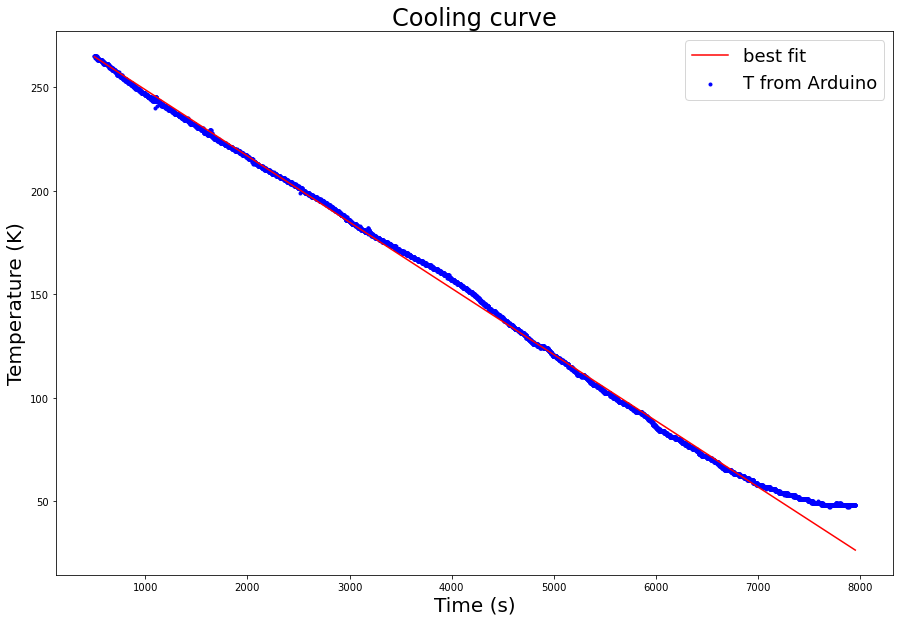

In [3]:
data = np.loadtxt("data\dati_2.txt")
x = data[500:,0]
y = data[500:,1]
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(x=x, y=y, marker='.', c='b', label="T from Arduino")
#ax.plot(x, y, linewidth=3,  c="coral", label="T from Arduino")
ax.set_title('Cooling curve',size=24)
ax.set_xlabel('Time (s)', fontsize=20)
ax.set_ylabel('Temperature (K)', fontsize=20)

m, b = np.polyfit(x[0:6000], y[0:6000], 1)
print(m,b)
plt.plot(x, m*x + b, c = 'r', label="best fit")
ax.legend(loc='best', fontsize=18)

plt.show()

[-3.19689091e-02  2.80628333e+02] [-2.84550928e-02  2.75963333e+02]
[1.49171700e-05 5.82600957e-02] [1.75018549e-04 9.31479192e-01]


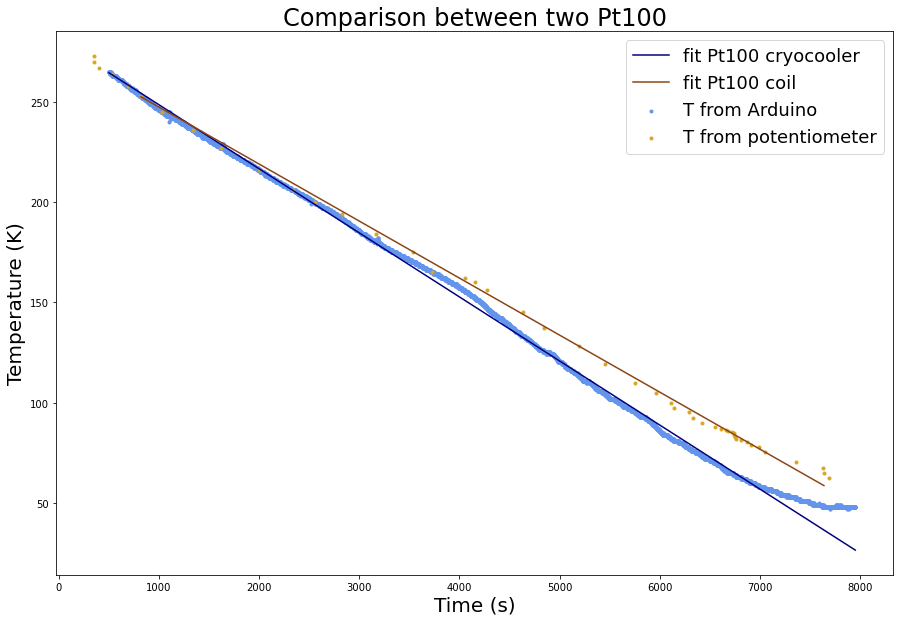

In [5]:
data = np.loadtxt("data\dati_2.txt")
data2 = np.loadtxt("data/test1.txt")
x = data[500:,0]
y = data[500:,1]
x2 = data2[:,0]
y2 = data2[:,1]
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(x=x, y=y, marker='.', c='cornflowerblue',label="T from Arduino")
ax.scatter(x2, y2, marker='.', c='goldenrod', label="T from potentiometer")
ax.set_title('Comparison between two Pt100',size=24)
ax.set_xlabel('Time (s)', fontsize=20)
ax.set_ylabel('Temperature (K)', fontsize=20)

m, cov = np.polyfit(x[0:6000], y[0:6000], 1,cov='True')
m1, cov1 = np.polyfit(x2, y2, 1,cov='True')

print(m,m1)
print(np.sqrt(np.diag(cov)),np.sqrt(np.diag(cov1)))
plt.plot(x, m[0]*x + m[1], c = 'navy', label="fit Pt100 cryocooler")
plt.plot(x2[5:47], m1[0]*x2[5:47] + m1[1], c = 'saddlebrown', label="fit Pt100 coil")
ax.legend(loc='best', fontsize=18)
plt.show()

[ 0.85929454  1.00413165 -0.04302346  0.06892257  0.06097188] 0.00030319183714509664


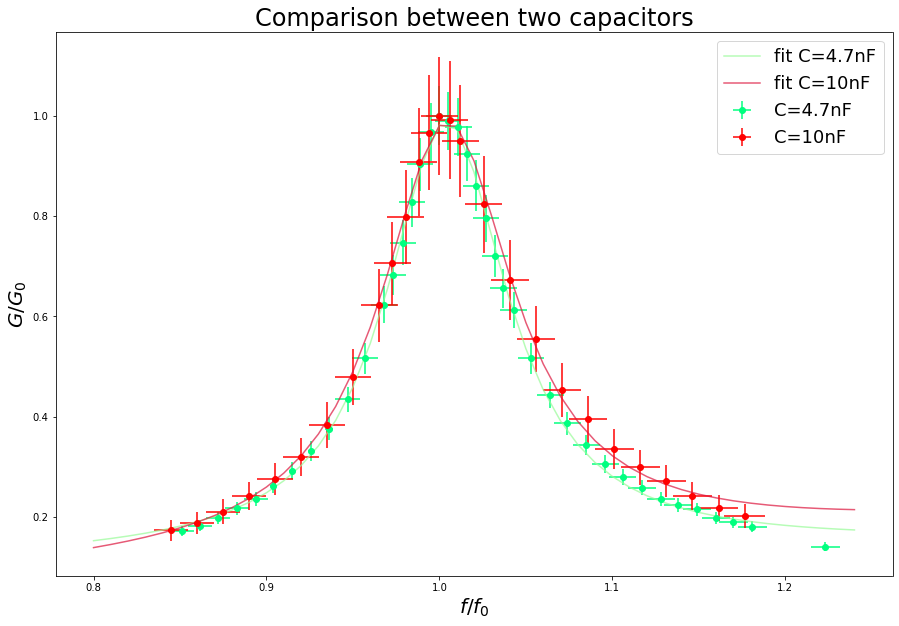

In [28]:
lor_5=pd.read_csv("data/47nF_norm.txt")
lor_10=pd.read_csv("data/10nF_norm.txt")

f1 = lor_5['Frequenze normalizzate']
G1 = lor_5['Guadagni normalizzati']
errf1 = lor_5['errF']
errG1 = lor_5['errG']

f2 = lor_10['Frequenze normalizzate']
G2 = lor_10['Guadagni normalizzati']
errf2 = lor_10['errF']
errG2 = lor_10['errG']

def lorentzian(f, I, f_0, S, a, b):
    return I/(1+((f-f_0)/S)**2)+a*f+b
x_fit= np.arange(0.8,1.25,0.01)

fig=plt.figure(figsize=(15,10))
plt.errorbar(f1, G1, yerr=errG1, xerr=errf1, errorevery=1, color='springgreen', fmt='o',label='C=4.7nF')
plt.errorbar(f2, G2, yerr=errG2, xerr=errf2, errorevery=1, color='red', fmt='o',label='C=10nF')
p_1, cov_1 = curve_fit(lorentzian, f1, G1, [0.8, 1, -0.08, 0.01, 0])
p_2, cov_2 = curve_fit(lorentzian, f2, G2, [0.8, 1, -0.08, 0.01, 0])
print(p_1,(cov_1[1,1])**(1/2))
plt.plot(x_fit,lorentzian(x_fit,*p_1), '-', color='palegreen', alpha=0.7, label='fit C=4.7nF')
plt.plot(x_fit,lorentzian(x_fit,*p_2), '-', color='crimson', alpha=0.7, label='fit C=10nF')
plt.title('Comparison between two capacitors', size=24)
plt.xlabel('$f/f_0$', fontsize=20)
plt.ylabel('$G/G_0$', fontsize=20)
plt.legend(fontsize=18)
plt.show()

In [ ]:
f_0 = 94000 
errF = 500
errC = 0.0000000003
C = 0.0000000047
print('la frequenza di risonanza per C=4.7 nF è', f_0)

L=1/(4*(np.pi**2)*(f_0**2)*C)
errC=0.3*1e-9
errF=0.7*1e3
errL=(((errC/(4*(np.pi**2)*(f_0**2)*(C**2)))**2)+((2*errF/(4*(np.pi**2)*(f_0**3)*(C)))**2))**(1/2)
print('L=',L*1000,'mH','\nerrL=',errL*1000,'mH')

[ 1.79341211e+01  1.15846302e+02 -1.02115025e+01  2.13452430e-02
  2.99640992e+00] 0.0701664271569979


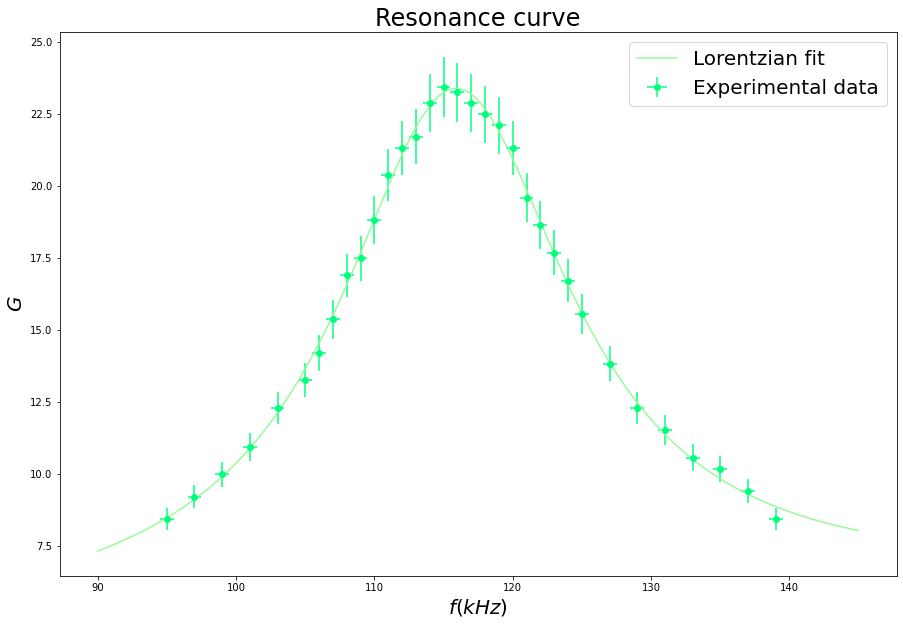

In [29]:
lor_1=pd.read_csv("data/presa1.txt")

f1 = lor_1['Frequenze']
G1 = lor_1['Guadagni']
errf1 = lor_1['errF']
errG1 = lor_1['errG']


def lorentzian(f, I, f_0, S, a, b):
    return I/(1+((f-f_0)/S)**2)+a*f+b
x_fit= np.arange(90,145,0.01)

fig=plt.figure(figsize=(15,10))
plt.errorbar(f1, G1, yerr=errG1, xerr=errf1, errorevery=1, color='springgreen', fmt='o',label='Experimental data')
p_1, cov_1 = curve_fit(lorentzian, f1, G1, [0.8, 115, -0.08, 0.01, 0])
plt.plot(x_fit,lorentzian(x_fit,*p_1), '-', color='palegreen', alpha=1, label='Lorentzian fit')
plt.title('Resonance curve',size=24)
plt.xlabel('$f(kHz)$', fontsize=20)
plt.ylabel('$G$', fontsize=20)
plt.legend(fontsize=20)
print(p_1,np.sqrt(cov_1[1,1]))
plt.show()


[ 1.81232608e+01  1.16022911e+02 -9.84174865e+00  4.67637642e-03
  4.58544842e+00] 0.09084156998683031


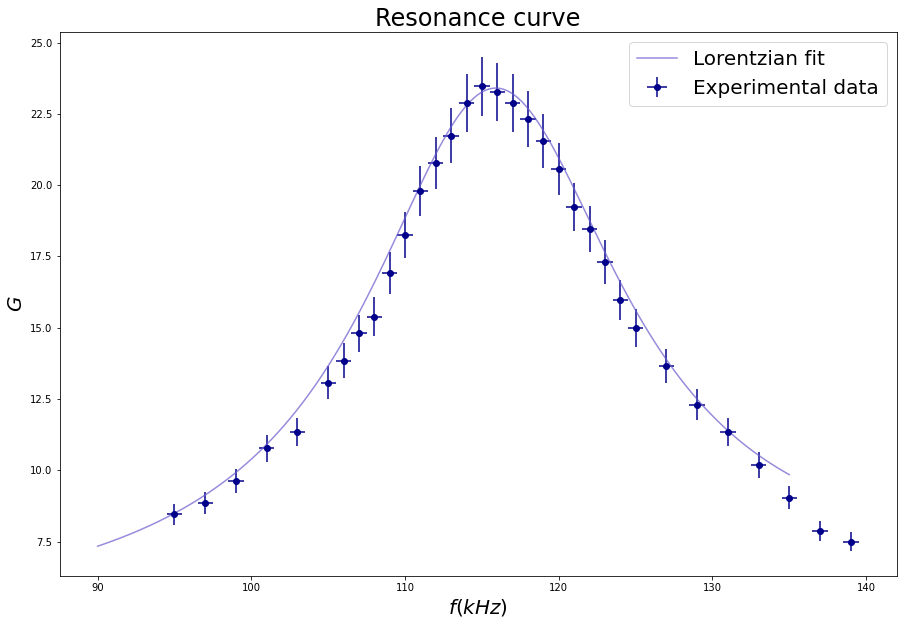

In [30]:
lor_2=pd.read_csv("data/presa2.txt")

f2 = lor_2['Frequenze']
G2 = lor_2['Guadagni']
errf2 = lor_2['errF']
errG2 = lor_2['errG']


def lorentzian(f, I, f_0, S, a, b):
    return I/(1+((f-f_0)/S)**2)+a*f+b
x_fit= np.arange(90,135,0.01)

fig=plt.figure(figsize=(15,10))
plt.errorbar(f2, G2, yerr=errG2, xerr=errf2, errorevery=1, color='darkblue', fmt='o',label='Experimental data')
p_2, cov_2 = curve_fit(lorentzian, f2, G2, [0.8, 116, -0.08, 0.01, 0])
plt.plot(x_fit,lorentzian(x_fit,*p_1), '-', color='slateblue', alpha=0.7, label='Lorentzian fit')
plt.title('Resonance curve', size=24)
plt.xlabel('$f(kHz)$', fontsize=20)
plt.ylabel('$G$', fontsize=20)
plt.legend(fontsize=20)
print(p_2,np.sqrt(cov_2[1,1]))
plt.show()